In [2]:
import numpy as np 
import pandas as pd 

import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import seaborn as sns

from scipy import stats

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/google-play-store-apps/googleplaystore.csv
/kaggle/input/google-play-store-apps/license.txt
/kaggle/input/google-play-store-apps/googleplaystore_user_reviews.csv


# **Apps Data Cleaning**

In [3]:
df1 = pd.read_csv('/kaggle/input/google-play-store-apps/googleplaystore.csv', delimiter=',')
df1.dataframeName = 'googleplaystore.csv'
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [4]:
df1.head(10)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
5,Paper flowers instructions,ART_AND_DESIGN,4.4,167,5.6M,"50,000+",Free,0,Everyone,Art & Design,"March 26, 2017",1.0,2.3 and up
6,Smoke Effect Photo Maker - Smoke Editor,ART_AND_DESIGN,3.8,178,19M,"50,000+",Free,0,Everyone,Art & Design,"April 26, 2018",1.1,4.0.3 and up
7,Infinite Painter,ART_AND_DESIGN,4.1,36815,29M,"1,000,000+",Free,0,Everyone,Art & Design,"June 14, 2018",6.1.61.1,4.2 and up
8,Garden Coloring Book,ART_AND_DESIGN,4.4,13791,33M,"1,000,000+",Free,0,Everyone,Art & Design,"September 20, 2017",2.9.2,3.0 and up
9,Kids Paint Free - Drawing Fun,ART_AND_DESIGN,4.7,121,3.1M,"10,000+",Free,0,Everyone,Art & Design;Creativity,"July 3, 2018",2.8,4.0.3 and up


In [5]:
# drop - clean - format & fix
# 1 check for duplicates, null 
# 2 check outliers by(column/datatype) 
# 3 fix the datatype for analysis

In [6]:
# for analysis purposes, I don't want any null data in Rating
# I think Rating has a big influence on EDA, so I chose to drop null
# I don't want to fill null rows with any value, and have around 14% of fake data   
dfc = df1.copy()
dfc.dropna(subset = ['Rating'], inplace = True)

dfc.info()
# We are left with about 9k rows

<class 'pandas.core.frame.DataFrame'>
Index: 9367 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             9367 non-null   object 
 1   Category        9367 non-null   object 
 2   Rating          9367 non-null   float64
 3   Reviews         9367 non-null   object 
 4   Size            9367 non-null   object 
 5   Installs        9367 non-null   object 
 6   Type            9367 non-null   object 
 7   Price           9367 non-null   object 
 8   Content Rating  9366 non-null   object 
 9   Genres          9367 non-null   object 
 10  Last Updated    9367 non-null   object 
 11  Current Ver     9363 non-null   object 
 12  Android Ver     9364 non-null   object 
dtypes: float64(1), object(12)
memory usage: 1.0+ MB


In [7]:
# We have mostly categorical values, so I'm only going to check App for duplicates.
# I chose to use Category and Reviews to confirm duplicate names are the same app

In [8]:
dfc[dfc.duplicated(['App','Category','Reviews'], keep = False)].sort_values('App').head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
1393,10 Best Foods for You,HEALTH_AND_FITNESS,4.0,2490,3.8M,"500,000+",Free,0,Everyone 10+,Health & Fitness,"February 17, 2017",1.9,2.3.3 and up
1407,10 Best Foods for You,HEALTH_AND_FITNESS,4.0,2490,3.8M,"500,000+",Free,0,Everyone 10+,Health & Fitness,"February 17, 2017",1.9,2.3.3 and up
2543,1800 Contacts - Lens Store,MEDICAL,4.7,23160,26M,"1,000,000+",Free,0,Everyone,Medical,"July 27, 2018",7.4.1,5.0 and up
2322,1800 Contacts - Lens Store,MEDICAL,4.7,23160,26M,"1,000,000+",Free,0,Everyone,Medical,"July 27, 2018",7.4.1,5.0 and up
2385,2017 EMRA Antibiotic Guide,MEDICAL,4.4,12,3.8M,"1,000+",Paid,$16.99,Everyone,Medical,"January 27, 2017",1.0.5,4.0.3 and up


In [9]:
dfc.drop_duplicates(subset = ['App','Category','Reviews'], keep = 'first', inplace = True)

In [10]:
# Still have some duplicate apps where the only difference is in Reviews number
dfc[dfc.duplicated(['App','Category'], keep = False)].sort_values('App').head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
5415,365Scores - Live Scores,SPORTS,4.6,666246,25M,"10,000,000+",Free,0,Everyone,Sports,"July 29, 2018",5.5.9,4.1 and up
3083,365Scores - Live Scores,SPORTS,4.6,666521,25M,"10,000,000+",Free,0,Everyone,Sports,"July 29, 2018",5.5.9,4.1 and up
1675,8 Ball Pool,GAME,4.5,14198297,52M,"100,000,000+",Free,0,Everyone,Sports,"July 31, 2018",4.0.0,4.0.3 and up
1970,8 Ball Pool,GAME,4.5,14201604,52M,"100,000,000+",Free,0,Everyone,Sports,"July 31, 2018",4.0.0,4.0.3 and up
1844,8 Ball Pool,GAME,4.5,14200550,52M,"100,000,000+",Free,0,Everyone,Sports,"July 31, 2018",4.0.0,4.0.3 and up


In [11]:
# I choose to keep the rows with the most reviews
dfc = dfc.sort_values(['App', 'Reviews'], ascending=[True, False])
dfc.drop_duplicates(subset=['App', 'Category'], keep='first', inplace=True)
dfc.info()
# number of rows dropped from 10841 to 8281 after cleaning

<class 'pandas.core.frame.DataFrame'>
Index: 8281 entries, 8532 to 882
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             8281 non-null   object 
 1   Category        8281 non-null   object 
 2   Rating          8281 non-null   float64
 3   Reviews         8281 non-null   object 
 4   Size            8281 non-null   object 
 5   Installs        8281 non-null   object 
 6   Type            8281 non-null   object 
 7   Price           8281 non-null   object 
 8   Content Rating  8280 non-null   object 
 9   Genres          8281 non-null   object 
 10  Last Updated    8281 non-null   object 
 11  Current Ver     8277 non-null   object 
 12  Android Ver     8278 non-null   object 
dtypes: float64(1), object(12)
memory usage: 905.7+ KB


In [12]:
# Outliers by column/datatype

In [13]:
dfc['Category'].unique()

array(['SOCIAL', 'COMICS', 'TOOLS', 'COMMUNICATION', 'NEWS_AND_MAGAZINES',
       'SPORTS', 'HEALTH_AND_FITNESS', 'FAMILY', 'BOOKS_AND_REFERENCE',
       'LIFESTYLE', 'BUSINESS', 'SHOPPING', 'MEDICAL', 'GAME',
       'PERSONALIZATION', 'PHOTOGRAPHY', 'TRAVEL_AND_LOCAL', 'DATING',
       'PRODUCTIVITY', 'ART_AND_DESIGN', 'FOOD_AND_DRINK',
       'VIDEO_PLAYERS', 'HOUSE_AND_HOME', 'MAPS_AND_NAVIGATION',
       'ENTERTAINMENT', 'FINANCE', 'EDUCATION', 'AUTO_AND_VEHICLES',
       'WEATHER', 'BEAUTY', 'EVENTS', 'LIBRARIES_AND_DEMO', 'PARENTING',
       '1.9'], dtype=object)

In [14]:
# it is one photo frame app under this category, change its category into 'PHOTOGRAPHY'
dfc.loc[(dfc['Category'] == '1.9'),'Category'] = 'PHOTOGRAPHY'

In [15]:
# max value 19 when rating should be within 1-5
dfc.describe()

,Rating
count,8281.000000
mean,4.176790
std,0.558933
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,19.000000


In [16]:
# drop the rows that have outliers, 
# I also decided to remove all the apps with a 5 rating, 
# which I don't think should be considered as legit cases  
dfc = dfc[(dfc['Rating'] < 5) & (dfc['Rating'] >= 0)]
dfc.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8009 entries, 8532 to 882
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             8009 non-null   object 
 1   Category        8009 non-null   object 
 2   Rating          8009 non-null   float64
 3   Reviews         8009 non-null   object 
 4   Size            8009 non-null   object 
 5   Installs        8009 non-null   object 
 6   Type            8009 non-null   object 
 7   Price           8009 non-null   object 
 8   Content Rating  8009 non-null   object 
 9   Genres          8009 non-null   object 
 10  Last Updated    8009 non-null   object 
 11  Current Ver     8005 non-null   object 
 12  Android Ver     8007 non-null   object 
dtypes: float64(1), object(12)
memory usage: 876.0+ KB


In [17]:
# to check outliers for Review, we need to change its data type
dfc['Reviews'] = dfc['Reviews'].astype('int')
dfc['Reviews'].describe().astype('int')
# There is no null. I don't want to make any adjustments before I learn more about this data
# For following the columns, if nothing is adjusted, I won't show the cleaning process anymore

count        8009
mean       289695
std       2130267
min             1
25%           178
50%          3829
75%         50060
max      78158306
Name: Reviews, dtype: int64

In [18]:
# change all size unit into mb and float
dfc['Size'] = dfc['Size'].apply(lambda x: str(x).replace('Varies with device', 'NaN') if 'Varies with device' in str(x) else x)

dfc['Size'] = dfc['Size'].apply(lambda x: str(x).replace('M', '') if 'M' in str(x) else x)
dfc['Size'] = dfc['Size'].apply(lambda x: str(x).replace(',', '') if 'M' in str(x) else x)
dfc['Size'] = dfc['Size'].apply(lambda x: float(str(x).replace('k', '')) / 1000 if 'k' in str(x) else x)
dfc['Size'] = dfc['Size'].apply(lambda x: float(x))
dfc['Size'] = dfc.groupby('Category')['Size'].transform(lambda x: x.fillna(x.median()))

In [19]:
# Create an integer version of installs
# Keep in mind it is still categorial data, only indicate the range of installs
dfc['Installs_num'] = dfc['Installs'].str.replace('+', '', regex=False)
dfc['Installs_num'] = dfc['Installs_num'].str.replace(',', '', regex=False).astype(int)

In [20]:
# change Price dtype to float
dfc['Price'] = dfc['Price'].apply(lambda x: str(x).replace('$', '') if '$' in str(x) else str(x))
dfc['Price'] = dfc['Price'].apply(lambda x: float(x))

In [21]:
# '감성학원 BL 첫사랑' This app contains BL content, I don't think it should be rated as Everyone content
# not a big issue, but I want to make sure apps with adult content get properly rated
dfc[dfc['Content Rating'] == 'Everyone'] 

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Installs_num
8532,+Download 4 Instagram Twitter,SOCIAL,4.5,40467,22.000,"1,000,000+",Free,0.00,Everyone,Social,"August 2, 2018",5.03,4.1 and up,1000000
4541,.R,TOOLS,4.5,259,0.203,"10,000+",Free,0.00,Everyone,Tools,"September 16, 2014",1.1.06,1.5 and up,10000
5940,058.ba,NEWS_AND_MAGAZINES,4.4,27,14.000,100+,Free,0.00,Everyone,News & Magazines,"July 6, 2018",1.0,4.2 and up,100
10252,1. FC Köln App,SPORTS,4.6,2019,41.000,"100,000+",Free,0.00,Everyone,Sports,"July 20, 2018",1.13.0,4.4 and up,100000
8483,10 Minutes a Day Times Tables,FAMILY,4.1,681,48.000,"100,000+",Free,0.00,Everyone,Education,"July 3, 2014",1.2,2.2 and up,100000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6420,감성학원 BL 첫사랑,COMICS,4.4,190,34.000,"10,000+",Free,0.00,Everyone,Comics,"November 17, 2017",3.2.1,3.0 and up,10000
4362,💎 I'm rich,LIFESTYLE,3.8,718,26.000,"10,000+",Paid,399.99,Everyone,Lifestyle,"March 11, 2018",1.0.0,4.4 and up,10000
2575,"💘 WhatsLov: Smileys of love, stickers and GIF",SOCIAL,4.6,22098,18.000,"1,000,000+",Free,0.00,Everyone,Social,"July 24, 2018",4.2.4,4.0.3 and up,1000000
7559,📏 Smart Ruler ↔️ cm/inch measuring for homework!,TOOLS,4.0,19,3.200,"10,000+",Free,0.00,Everyone,Tools,"October 21, 2017",1.0,4.2 and up,10000


In [22]:
#Fix apps' incorrect content_rating, from teen / everyone to Mature 17+

# List of keywords
keywords = ['adult', 'erotic', 'nude', 'sex']
import re
pattern = r'\b(' + '|'.join(keywords) + r')\b'

# filter set
fd = dfc[dfc['App'].str.contains(pattern, flags=re.IGNORECASE, na=False)]
fdt = fd[~fd['Content Rating'].str.contains('Mature', case = False)]
fdt.head()

/tmp/ipykernel_33/415907921.py:9: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  fd = dfc[dfc['App'].str.contains(pattern, flags=re.IGNORECASE, na=False)]


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Installs_num
6991,Adult Color By Number Book: Number Coloring Pages,FAMILY,4.2,2231,37.0,"500,000+",Free,0.0,Everyone,Entertainment,"July 23, 2018",2.9,4.4 and up,500000
7002,Adult Color by Number Book - Paint Mandala Pages,FAMILY,4.3,997,23.0,"100,000+",Free,0.0,Everyone,Entertainment,"June 27, 2018",2.4,4.1 and up,100000
528,Adult Dirty Emojis,DATING,2.8,80,5.5,"10,000+",Free,0.0,Teen,Dating,"November 6, 2017",1.0,4.0.3 and up,10000
887,Adult Glitter Color by Number Book - Sandbox P...,ENTERTAINMENT,4.3,8918,18.5,"1,000,000+",Free,0.0,Everyone,Entertainment;Creativity,"July 21, 2018",1.7,4.4 and up,1000000
991,ColorFul - Adult Coloring Book,ENTERTAINMENT,4.6,50725,19.0,"5,000,000+",Free,0.0,Everyone,Entertainment,"May 25, 2018",1.0.64,4.0.3 and up,5000000


In [23]:
dfc.loc[fdt.index, 'Content Rating'] = 'Mature 17+'
dfc.loc[fdt.index]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Installs_num
6991,Adult Color By Number Book: Number Coloring Pages,FAMILY,4.2,2231,37.0,"500,000+",Free,0.0,Mature 17+,Entertainment,"July 23, 2018",2.9,4.4 and up,500000
7002,Adult Color by Number Book - Paint Mandala Pages,FAMILY,4.3,997,23.0,"100,000+",Free,0.0,Mature 17+,Entertainment,"June 27, 2018",2.4,4.1 and up,100000
528,Adult Dirty Emojis,DATING,2.8,80,5.5,"10,000+",Free,0.0,Mature 17+,Dating,"November 6, 2017",1.0,4.0.3 and up,10000
887,Adult Glitter Color by Number Book - Sandbox P...,ENTERTAINMENT,4.3,8918,18.5,"1,000,000+",Free,0.0,Mature 17+,Entertainment;Creativity,"July 21, 2018",1.7,4.4 and up,1000000
991,ColorFul - Adult Coloring Book,ENTERTAINMENT,4.6,50725,19.0,"5,000,000+",Free,0.0,Mature 17+,Entertainment,"May 25, 2018",1.0.64,4.0.3 and up,5000000
1354,"Eve Period Tracker - Love, Sex & Relationships...",HEALTH_AND_FITNESS,4.6,20326,28.0,"1,000,000+",Free,0.0,Mature 17+,Health & Fitness,"August 4, 2018",2.9.18,4.1 and up,1000000


In [24]:
# drop columns that we are not interested
dfc.drop(columns = ['Genres', 'Last Updated','Current Ver', 'Android Ver'], inplace = True)

In [25]:
dfc.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8009 entries, 8532 to 882
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             8009 non-null   object 
 1   Category        8009 non-null   object 
 2   Rating          8009 non-null   float64
 3   Reviews         8009 non-null   int64  
 4   Size            8009 non-null   float64
 5   Installs        8009 non-null   object 
 6   Type            8009 non-null   object 
 7   Price           8009 non-null   float64
 8   Content Rating  8009 non-null   object 
 9   Installs_num    8009 non-null   int64  
dtypes: float64(3), int64(2), object(5)
memory usage: 946.3+ KB


In [26]:
dfc.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Installs_num
8532,+Download 4 Instagram Twitter,SOCIAL,4.5,40467,22.000,"1,000,000+",Free,0.0,Everyone,1000000
324,- Free Comics - Comic Apps,COMICS,3.5,115,9.100,"10,000+",Free,0.0,Mature 17+,10000
4541,.R,TOOLS,4.5,259,0.203,"10,000+",Free,0.0,Everyone,10000
4636,/u/app,COMMUNICATION,4.7,573,53.000,"10,000+",Free,0.0,Mature 17+,10000
5940,058.ba,NEWS_AND_MAGAZINES,4.4,27,14.000,100+,Free,0.0,Everyone,100


# **Reviews Data Cleaning**

In [27]:
df2 = pd.read_csv('/kaggle/input/google-play-store-apps/googleplaystore_user_reviews.csv', delimiter=',')
df2.dataframeName = 'googleplaystore_user_reviews.csv'
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64295 entries, 0 to 64294
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   App                     64295 non-null  object 
 1   Translated_Review       37427 non-null  object 
 2   Sentiment               37432 non-null  object 
 3   Sentiment_Polarity      37432 non-null  float64
 4   Sentiment_Subjectivity  37432 non-null  float64
dtypes: float64(2), object(3)
memory usage: 2.5+ MB


In [28]:
df2.head()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
2,10 Best Foods for You,NaN,NaN,NaN,NaN
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000


In [29]:
# when Sentiment is Positive, Sentiment_Polarity > 0 
# Drop NaN rows, and join columns from the store table
df2 = pd.merge(df2, dfc[['App', 'Category', 'Rating','Installs_num']], on='App', how='left')
df2 = df2.dropna()
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 38494 entries, 0 to 68648
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   App                     38494 non-null  object 
 1   Translated_Review       38494 non-null  object 
 2   Sentiment               38494 non-null  object 
 3   Sentiment_Polarity      38494 non-null  float64
 4   Sentiment_Subjectivity  38494 non-null  float64
 5   Category                38494 non-null  object 
 6   Rating                  38494 non-null  float64
 7   Installs_num            38494 non-null  float64
dtypes: float64(4), object(4)
memory usage: 2.6+ MB


In [30]:
# drop duplicates so group by does not combine the reviews from the same app
df2.drop_duplicates(subset = ['Translated_Review','App'],inplace = True)

In [31]:
# according to the author, there should only be 100 reviews for each app, so let's see
# what happened to those rows that have over 100 reviews.
df2.groupby(['App']).count().sort_values(by = ['Sentiment'], ascending = False)
# 5 more apps that have over 100 review, I decided to keep them since the number is not too far from 100

,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity,Category,Rating,Installs_num
App,,,,,,,
Facebook,130,130,130,130,130,130,130
Episode - Choose Your Story,124,124,124,124,124,124,124
Angry Birds Classic,107,107,107,107,107,107,107
Family Locator - GPS Tracker,105,105,105,105,105,105,105
Google Photos,101,101,101,101,101,101,101
...,...,...,...,...,...,...,...
HD Camera,1,1,1,1,1,1,1
All-in-One Mahjong 3 FREE,1,1,1,1,1,1,1
Caller ID +,1,1,1,1,1,1,1


# **EDA**


**I am aiming to help app devaloper to have a better picture of the market. Mainly focus on install number.**   

**Knowing the rough number of installs your app will get can make it easier when making decision like how much to invest initially, or help estimate value of the app ..etc**      

**In this part I want to know the relation and correlation between install number and other columns** .

Text(0.5, 1.0, 'Insatlls number distribution')

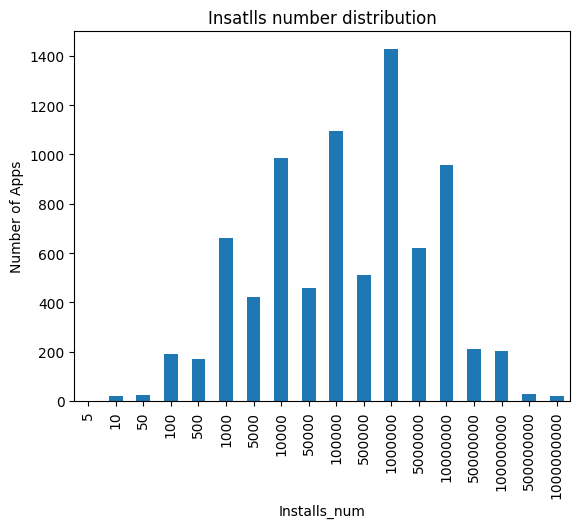

In [32]:
#installs number distribution 
dfc.groupby("Installs_num")["App"].count().plot.bar( ylabel = 'Number of Apps')
dfc['Installs_num'].describe().astype(int)
plt.title('Insatlls number distribution')

In [33]:
dfc['Installs_num'].describe().astype('int')

count          8009
mean        9984715
std        60830102
min               5
25%           10000
50%          100000
75%         5000000
max      1000000000
Name: Installs_num, dtype: int64

>### Category vs Installs number

total of 33 categories , we can see **Family**, **Game** and **Tools** are the most release category. 

But which category is doing the best?

,Category,count,percentage
0,FAMILY,1617,20.19
1,GAME,901,11.25
2,TOOLS,703,8.78
3,FINANCE,294,3.67
4,PRODUCTIVITY,293,3.66
5,PERSONALIZATION,288,3.60
6,LIFESTYLE,272,3.40
7,MEDICAL,266,3.32
8,SPORTS,258,3.22
9,PHOTOGRAPHY,257,3.21


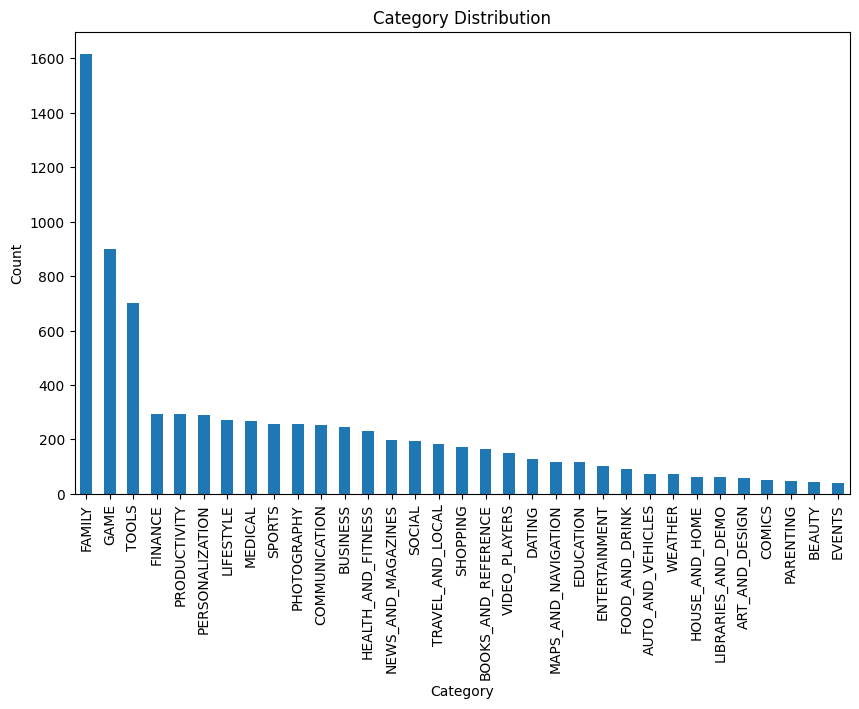

In [34]:
#category distribution

g_category = dfc.groupby('Category')

g_category_count = g_category.size().sort_values(ascending = False).reset_index(name='count')
g_category_count['percentage'] = (g_category_count['count'] / g_category_count['count'].sum() * 100).round(2)

g_category_count.set_index('Category')['count'].plot.bar(title='Category Distribution', ylabel='Count', figsize=(10, 6))
g_category_count

### Average Install,Rating of each category, order by installs_num
- (we dont have the exact install number so the average intslls number should not be consider as real number, but as a range)

In [35]:
avg_rating_bc = g_category['Rating'].mean().reset_index()
avg_rating_bc.columns = ['Category', 'Avg_Rating']

tdc = g_category['Installs_num'].describe().sort_values('mean',ascending = False).astype(int)
tdc = pd.merge(tdc, avg_rating_bc, on ='Category')

tdc

,Category,count,mean,std,min,25%,50%,75%,max,Avg_Rating
0,COMMUNICATION,252,43806512,166386529,10,10000,1000000,10000000,1000000000,4.103968
1,SOCIAL,195,28142772,133191759,100,10000,1000000,5000000,1000000000,4.216410
2,VIDEO_PLAYERS,149,26387900,122861635,100,10000,1000000,10000000,1000000000,4.044966
3,ENTERTAINMENT,102,20722156,100575682,10000,1000000,1000000,10000000,1000000000,4.135294
4,PRODUCTIVITY,293,19771567,84546475,10,10000,1000000,5000000,1000000000,4.161092
5,PHOTOGRAPHY,257,18090045,67233277,10,100000,1000000,10000000,1000000000,4.137743
6,TRAVEL_AND_LOCAL,184,15732927,104474899,100,10000,1000000,5000000,1000000000,4.054348
7,GAME,901,15498071,52831118,10,100000,1000000,10000000,1000000000,4.237070
8,NEWS_AND_MAGAZINES,197,12025934,86790367,50,10000,100000,1000000,1000000000,4.090355
9,TOOLS,703,11523065,59119085,10,10000,100000,1000000,1000000000,4.017070


Seems like the most downloaded categroies are mostly defult apps and social media that most ppl have.  
Following these categories are productivity, photography, travel and games.


Difference in Average Rating accross category are not that big (min 3.97 - max 4.43),   
especailly compare to Install number(range). 
Which make the relationship between AVG install(range) and AVG rating seems week.  

My current assumption is category have a highinflunce on install number.   
Like some categories are more likely to have highier installs number under the same conditions.   

### Correlation of Category and Installs

To determine whether app install numbers significantly differ across categories, I divided  categories into three groups: top, middle, bottom, based on their average number of installs, each groups contains 5 categories.

Since the **install_num** is binned and not normally distributed. I choose to use **Kruskal-Wallis test** to confirm our hypothesis.

In [36]:
from scipy.stats import kruskal

# top, mid, low categories
mean_installs = dfc.groupby("Category")["Installs_num"].mean().sort_values()
low_cats = mean_installs.index[:5]
mid_cats = mean_installs.index[14:19] 
top_cats = mean_installs.index[-5:]

low_group = dfc[dfc['Category'].isin(low_cats)]
mid_group = dfc[dfc['Category'].isin(mid_cats)]
top_group = dfc[dfc['Category'].isin(top_cats)]

low_group_in = low_group['Installs_num']
mid_group_in = mid_group['Installs_num']
top_group_in = top_group['Installs_num']

kruskal(top_group_in, mid_group_in, low_group_in)


KruskalResult(statistic=257.8040541072858, pvalue=1.0436645796980895e-56)

The test result indicate **there are significant difference** in install behavior between category groups.   
And since we used Kruskal-Wallis test, it is unlikely the difference are driven by extreme values. 

We can also see in the following chart. 

Text(0.5, 1.0, 'Install Distribution by Category Group')

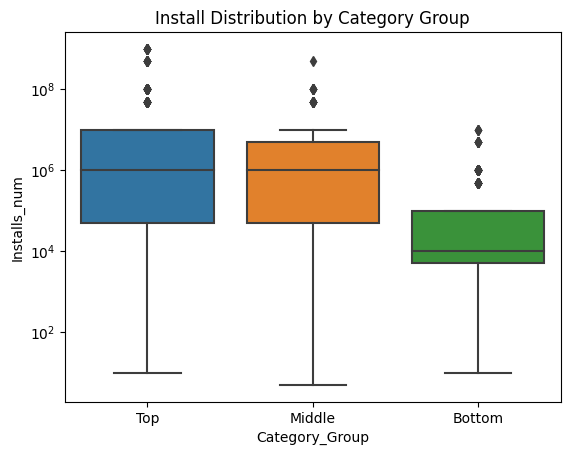

In [37]:
dfc['Category_Group'] = dfc['Category'].apply(
    lambda x: 'Top' if x in top_cats else ('Middle' if x in mid_cats else ('Bottom' if x in low_cats else 'Other'))
)

sns.boxplot(data=dfc[dfc['Category_Group'] != 'Other'], x='Category_Group', y='Installs_num')
plt.yscale('log')  # Optional: makes skewed data clearer
plt.title('Install Distribution by Category Group')


### Comparison between high and low-installed category group

We can also compare different groups install number(range) at the same rating to see their performance.

Text(0, 0.5, 'Percentage %')

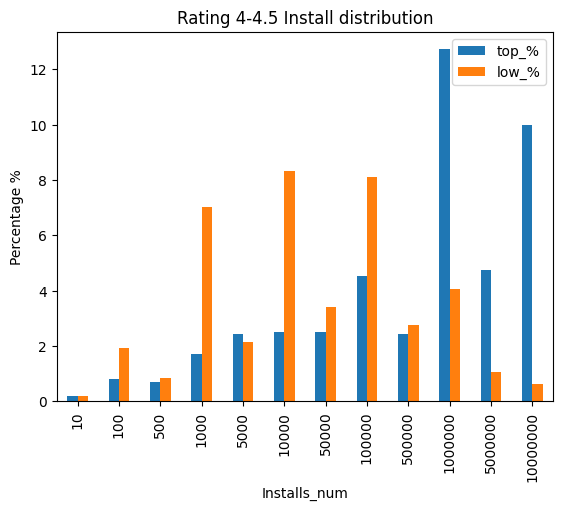

In [79]:
# Two groups at the same Rating between 4 - 4.5
# Even though having the same high rating, higher installed categories still have more high-install apps
rating4_low = low_group[(low_group['Rating']>=4) & (low_group['Rating']<4.5)]
rating4_top = top_group[(top_group['Rating']>=4) & (top_group['Rating']<4.5)]

low_total_count = low_group['App'].count()
top_total_count = top_group['App'].count()

low_rating4_pst = rating4_low.groupby('Installs_num').count()['App'].rename('low_%')/low_total_count*100
top_rating4_pst = rating4_top.groupby('Installs_num').count()['App'].rename('top_%')/top_total_count*100
r4 = pd.merge(top_rating4_pst,low_rating4_pst,on = 'Installs_num')
r4.plot.bar(title = 'Rating 4-4.5 Install distribution').set_ylabel('Percentage %')

Text(0, 0.5, 'Percentage %')

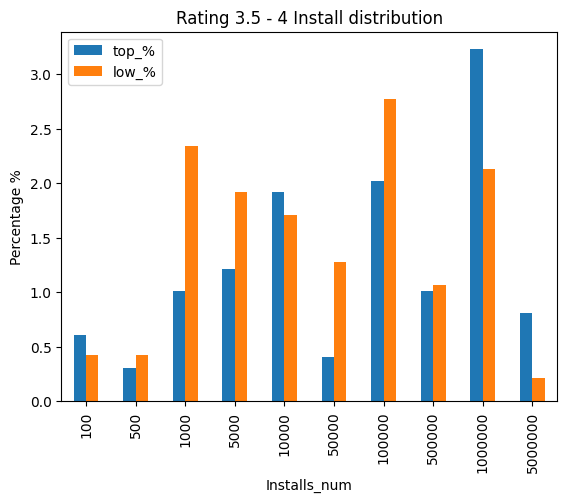

In [80]:
# doesn't have a significant difference around mid rating.
rating3_low = low_group[(low_group['Rating']>=3.5) & (low_group['Rating']<4)]
rating3_top = top_group[(top_group['Rating']>=3.5) & (top_group['Rating']<4)]

low_rating3_pst = rating3_low.groupby('Installs_num').count()['App'].rename('low_%')/low_total_count*100
top_rating3_pst = rating3_top.groupby('Installs_num').count()['App'].rename('top_%')/top_total_count*100
r3 = pd.merge(top_rating3_pst,low_rating3_pst,on = 'Installs_num')
r3.plot.bar(title = 'Rating 3.5 - 4 Install distribution').set_ylabel('Percentage %')

Text(0, 0.5, 'Percentage %')

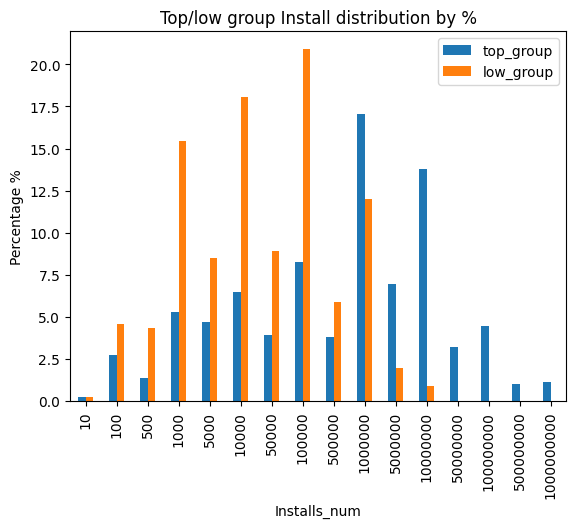

In [40]:
l = (low_group.groupby(['Installs_num'],dropna = False)['App'].count()/459*100).reset_index(name = 'low_group')
nl =  pd.DataFrame({'Installs_num': [50000000,100000000,500000000,1000000000], 'low_group': [0,0,0,0]})
fli = pd.concat([l, nl], ignore_index=True)
h = (top_group.groupby(['Installs_num'], dropna = False)['App'].count()/ 1175*100).reset_index(name = 'top_group')
nh = pd.DataFrame({'Installs_num': [1], 'top_group': [0]})
fhi = pd.concat([h, nh], ignore_index=True)
ai = pd.merge(fhi,fli,on = 'Installs_num')
ai.set_index('Installs_num').sort_index().plot.bar(title = 'Top/low group Install distribution by %').set_ylabel('Percentage %')

Category appears to be a major factor influencing install numbers, my guess is that this is due to differences in **market size and user demand** across app categories.

Even when apps have similar ratings (above 4), **the top install categories tend to have a higher peak install count and fewer low-install apps compared to lower-ranked categories**.

This suggests that choosing the right category can increase the likelihood of getting higher install numbers.

Text(0, 0.5, 'Percentage %')

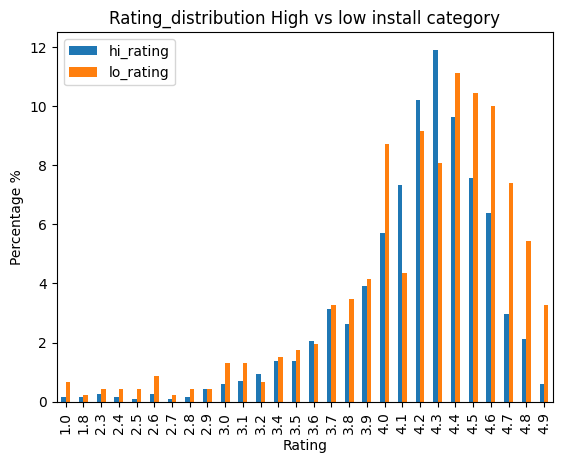

In [82]:
#compare differenct in high and low install category groups(size, rating) 

hr = top_group.groupby(['Rating']).size().reset_index(name = 'hi_rating')
hr['hi_rating'] = hr['hi_rating'] / 1175 *100
lr = low_group.groupby(['Rating']).size().reset_index(name = 'lo_rating')
lr['lo_rating'] = lr['lo_rating'] / 459 *100
hvsl_r = pd.merge(hr,lr,on = 'Rating').set_index(['Rating'])
hvsl_r.plot.bar(title = 'Rating_distribution High vs low install category').set_ylabel('Percentage %')


<Axes: title={'center': 'Size_distribution High vs low install category'}, xlabel='Size'>

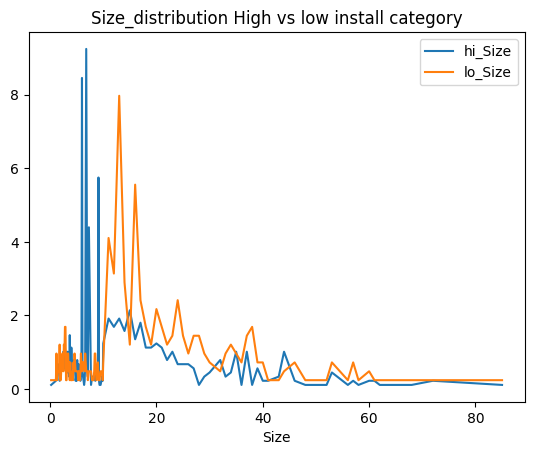

In [42]:
hr = top_group.groupby(['Size']).size().reset_index(name = 'hi_Size')
hr['hi_Size'] = hr['hi_Size'] / 887 *100

lr = low_group.groupby(['Size']).size().reset_index(name = 'lo_Size')
lr['lo_Size'] = lr['lo_Size'] / 414 *100
hvsl_r = pd.merge(hr,lr,on = 'Size').set_index(['Size'])
hvsl_r.plot(title = 'Size_distribution High vs low install category')

> ## Rating vs Installs number

Text(0, 0.5, 'counts')

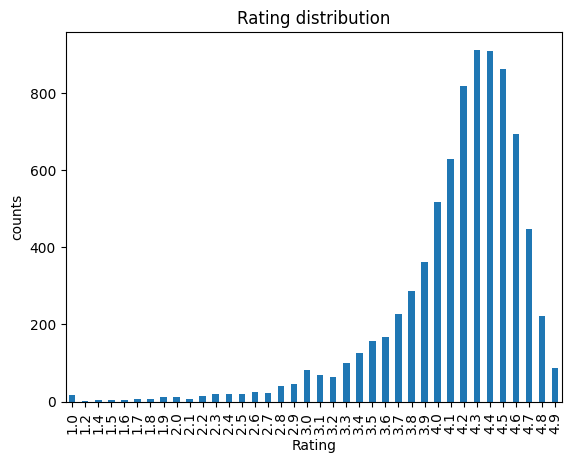

In [43]:
#see distribution of rating
dfc['Rating'].value_counts().sort_index().plot.bar(title = 'Rating distribution').set_ylabel('counts')

In [113]:
dfc['Rating'].describe().astype('float')

count    8009.000000
mean        4.147085
std         0.521308
min         1.000000
25%         4.000000
50%         4.300000
75%         4.500000
max         4.900000
Name: Rating, dtype: float64

In [45]:
# the mean of all rating is 4.17, std is 0.53, 50% is 4.3
# I set 4.3 and above as high rating, and rating below 4 as low rating
bins = [0, 1, 2, 3, 4, 4.5, 5] 
labels = ['(0, 1]', '(1, 2]', '(2, 3]', '(3, 4]', '(4, 4.3]', '(4.3, 5]']
dfc['Rating_Group'] = pd.cut(dfc['Rating'], bins=bins, labels=labels, right=True)

In [46]:
drg = dfc.groupby(['Rating_Group'], observed = True)
drg['Installs_num'].mean().astype(int).sort_index()

Rating_Group
(0, 1]           323
(1, 2]        119829
(2, 3]        185902
(3, 4]       4755828
(4, 4.3]    14560470
(4.3, 5]     6854260
Name: Installs_num, dtype: int64

Most users don't download app that has below 3 rating.  
With a huge about 2.5 times download difference between rating 3-4 and 4-4.3, we can say that an app with a 4 or above rating will very likely have more install number than the one with lower rating.

### Correlation between Insatll and Rating

In [47]:
# Over all realtion with installs
np.log(dfc['Installs_num']).corr(dfc['Rating'])

0.21447977530556592

Rating
3.5     1481269
3.6     1356986
3.7     7061725
3.8     2143388
3.9     8152203
4.0     7551141
4.1     7720894
4.2    11257683
4.3    19700917
4.4    15757776
4.5    15978816
4.6     9789959
4.7     6072365
4.8     1727262
4.9      393983
Name: Installs_num, dtype: int64

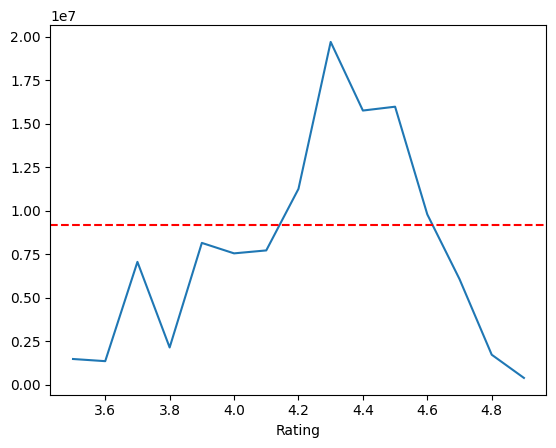

In [112]:
# Avg intalls in between rating 3.5 - 5 
mrftf = dfc[dfc['Rating'] >= 3.5]
mrftf.groupby('Rating')['Installs_num'].mean().plot()
plt.axhline(y=9188736, color='r', linestyle='--', label=f'Average: {9188736:.2f}')
mrftf.groupby('Rating')['Installs_num'].mean().astype(int)

The apps with the highest install counts tend to have ratings between 4.2 and 4.6, with the **average number of installs peaking around a 4.3 rating** and gradually declining beyond that point.

This trend makes sense — after a certain point, improving an already high rating may not result in significantly more installs. In this dataset, **4.3 appears to be a turning point**.

While the overall correlation between rating and installs is weak, the analysis suggests that it is still **worthwhile for app developers to aim for a strong rating — ideally up to around 4.3** — to maximize potential downloads.

### Positive & Negative correlation rating groups comparison

Text(0, 0.5, 'percentage %')

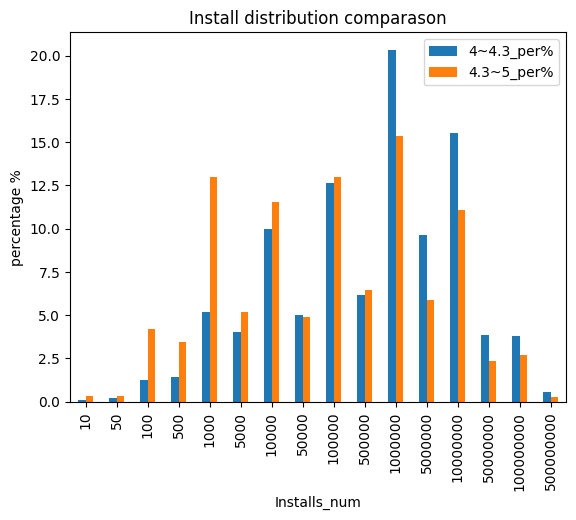

In [108]:
# Install distribution comparason between 4-4.3 (rasing installs) and 4.3-5 rating (droping installs)
dir = dfc[(dfc['Rating_Group'] == '(4.3, 5]') ]
dirg = dir.groupby(['Installs_num']).size().reset_index(name = '4.3~5')
dirfp = dfc[(dfc['Rating_Group'] == '(4, 4.3]') ]
dirfpg = dirfp.groupby(['Installs_num']).size().reset_index(name = '4~4.3')
dirm = dirg.merge(dirfpg, on ='Installs_num', how = 'left').fillna(0)
dirm['4.3~5_per%'] = dirm['4.3~5']/ dirg['4.3~5'].sum()*100
dirm['4~4.3_per%'] = dirm['4~4.3']/ dirfpg['4~4.3'].sum()*100
dirm[['Installs_num','4~4.3_per%','4.3~5_per%' ]].set_index('Installs_num').plot.bar(title= 'Install distribution comparason').set_ylabel('percentage %')


In [50]:
# App charging strategy comparison between 4-4.3 and 4.3-5
charge_r = dir[dir['Price']>0]['Price'].count()
rp = (charge_r/dir['Price'].count()*100).round(2)
rpm = (dir['Price'].sum()/charge_r).round(2)

charge_d = dirfp[dirfp['Price']>0]['Price'].count()
dp = (charge_d/dirfp['Price'].count()*100).round(2)
dpm = (dirfp['Price'].sum()/charge_r).round(2)

pd.DataFrame({'4-4.3':[rp,rpm],'4.3-5':[dp,dpm]}, index = ['Charge_percentage(%)','Average_price($)'])

,4-4.3,4.3-5
Charge_percentage(%),11.75,6.54
Average_price($),4.53,18.45


<Axes: title={'center': 'Category_difference(4-4.3rating minus 4.3-5rating)'}, xlabel='Category', ylabel='Percentage_%'>

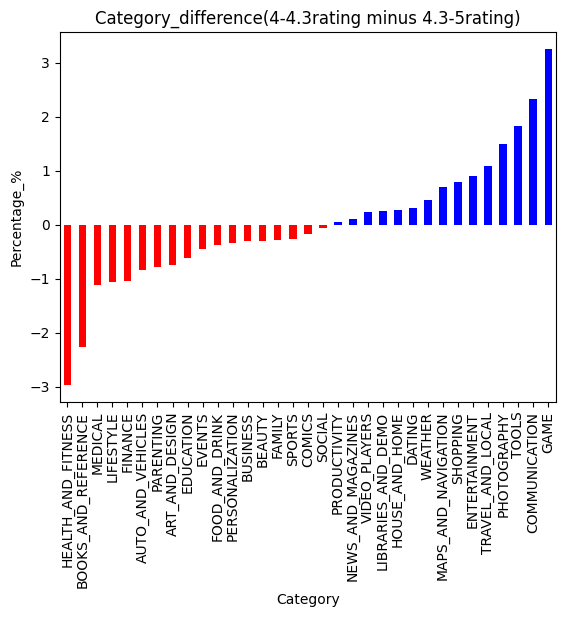

In [105]:
dcd = (dir.groupby(['Category'],dropna = False)['App'].count().rename('4.3-5') / dir['App'].count()*100).round(2)
rcd = (dirfp.groupby(['Category'],dropna = False)['App'].count().rename('4-4.3') / dirfp['App'].count()*100).round(2)
diffd = (rcd - dcd).sort_values()
colors = ['blue' if v > 0 else 'red' for v in diffd]
diffd.plot.bar(title = 'Category_difference(4-4.3rating minus 4.3-5rating)',ylabel = 'Percentage_%',color = colors)
# the category percentage difference between two rating groups
# we have more GAME, COMMUNICATION, TOOLS, PHOTOGRAPHY, TRAVEL_AND_LOCAL 
# in the 4 - 4.3 rating (positive corelation) 

**top 5 categorids and it's average install numbers rank**
* **4-4.3 rating :**     
   GAME : 7,  COMMUNICATION : 1,  TOOLS : 10,  PHOTOGRAPHY : 5,  TRAVEL_AND_LOCAL : 6
* **4.3-5 rating:**     
  HEALTH_AND_FITNESS : 15,  LIFESTYLE : 23,  BOOKS_AND_REFERENCE : 11,  MEDICAL : 33,  FAMILY : 18

With these analysis, devaloper can have more information when making decision.

# Sentiment

In [87]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 28250 entries, 0 to 68648
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   App                     28250 non-null  object 
 1   Translated_Review       28250 non-null  object 
 2   Sentiment               28250 non-null  object 
 3   Sentiment_Polarity      28250 non-null  float64
 4   Sentiment_Subjectivity  28250 non-null  float64
 5   Category                28250 non-null  object 
 6   Rating                  28250 non-null  float64
 7   Installs_num            28250 non-null  float64
dtypes: float64(4), object(4)
memory usage: 1.9+ MB


In [88]:
df2.head()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity,Category,Rating,Installs_num
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333,HEALTH_AND_FITNESS,4.0,500000.0
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462,HEALTH_AND_FITNESS,4.0,500000.0
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000,HEALTH_AND_FITNESS,4.0,500000.0
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000,HEALTH_AND_FITNESS,4.0,500000.0
5,10 Best Foods for You,Best way,Positive,1.00,0.300000,HEALTH_AND_FITNESS,4.0,500000.0


In [100]:
df2.describe()

,Sentiment_Polarity,Sentiment_Subjectivity,Rating,Installs_num
count,28250.000000,28250.000000,28250.000000,2.825000e+04
mean,0.188273,0.492303,4.290074,3.274855e+07
std,0.354657,0.264011,0.309059,1.249355e+08
min,-1.000000,0.000000,2.600000,1.000000e+03
25%,0.000000,0.350000,4.100000,1.000000e+06
50%,0.157143,0.515829,4.300000,5.000000e+06
75%,0.419117,0.650000,4.500000,1.000000e+07
max,1.000000,1.000000,4.900000,1.000000e+09


In [99]:
df2['App'].nunique()

816

In [98]:
#total fo 816 apps in the table
#516 has 10 more positive review than negative
d2a = df2.groupby(['App','Sentiment'])
das = d2a.size().unstack(fill_value=0)
das[das['Positive']>=das['Negative']+10]

Sentiment,Negative,Neutral,Positive
App,,,
10 Best Foods for You,5,11,79
11st,7,9,23
1800 Contacts - Lens Store,3,5,32
1LINE – One Line with One Touch,8,3,27
2018Emoji Keyboard 😂 Emoticons Lite -sticker&gif,1,6,22
...,...,...,...
Hostelworld: Hostels & Cheap Hotels Travel App,6,6,26
HotelTonight: Book amazing deals at great hotels,11,12,70
Hotels.com: Book Hotel Rooms & Find Vacation Deals,12,5,22


In [53]:
d2a.describe()

Sentiment_Polarity            \
                                                      count      mean   
App                            Sentiment                                
10 Best Foods for You          Negative                 5.0 -0.405000   
                               Neutral                 11.0  0.000000   
                               Positive                79.0  0.585900   
11st                           Negative                 7.0 -0.336458   
                               Neutral                  9.0  0.000000   
...                                                     ...       ...   
Hotwire Hotel & Car Rental App Neutral                 11.0  0.000000   
                               Positive                16.0  0.499550   
Housing-Real Estate & Property Negative                10.0 -0.337927   
                               Neutral                  3.0  0.000000   
                               Positive                 8.0  0.366162   

                                                                        \
                                               std       min       25%   
App                            Sentiment                                 
10 Best Foods for You          Negative   0.252735 -0.800000 -0.500000   
                               Neutral    0.000000  0.000000  0.000000   
                               Positive   0.252560  0.100000  0.405357   
11st                           Negative   0.318511 -1.000000 -0.357812   
                               Neutral    0.000000  0.000000  0.000000   
...                                            ...       ...       ...   
Hotwire Hotel & Car Rental App Neutral    0.000000  0.000000  0.000000   
                               Positive   0.208010  0.165000  0.356875   
Housing-Real Estate & Property Negative   0.170531 -0.528571 -0.475000   
                               Neutral    0.000000  0.000000  0.000000   
                               Positive   0.273484  0.021591  0.212083   

                                                                     \
                                               50%       75%    max   
App                            Sentiment                              
10 Best Foods for You          Negative  -0.325000 -0.200000 -0.200   
                               Neutral    0.000000  0.000000  0.000   
                               Positive   0.600000  0.731061  1.000   
11st                           Negative  -0.308333 -0.140625 -0.050   
                               Neutral    0.000000  0.000000  0.000   
...                                            ...       ...    ...   
Hotwire Hotel & Car Rental App Neutral    0.000000  0.000000  0.000   
                               Positive   0.466667  0.700000  0.800   
Housing-Real Estate & Property Negative  -0.370139 -0.294792 -0.025   
                               Neutral    0.000000  0.000000  0.000   
                               Positive   0.250000  0.557031  0.800   

                                         Sentiment_Subjectivity            \
                                                          count      mean   
App                            Sentiment                                    
10 Best Foods for You          Negative                     5.0  0.355000   
                               Neutral                     11.0  0.000000   
                               Positive                    79.0  0.570685   
11st                           Negative                     7.0  0.435615   
                               Neutral                      9.0  0.148148   
...                                                         ...       ...   
Hotwire Hotel & Car Rental App Neutral                     11.0  0.162500   
                               Positive                    16.0  0.603289   
Housing-Real Estate & Property Negative                    10.0  0.371935   
                               Neutral                      3.

In [54]:
# Sentiment_Polarity ranking
df2.groupby(['Category']).describe()['Sentiment_Polarity'].sort_values('mean', ascending = False)

,count,mean,std,min,25%,50%,75%,max
Category,,,,,,,,
COMICS,45.0,0.449810,0.292034,-0.05,0.285714,0.433333,0.650000,1.0
EVENTS,156.0,0.375086,0.383804,-1.00,0.119792,0.416667,0.618750,1.0
AUTO_AND_VEHICLES,283.0,0.343119,0.331257,-1.00,0.105608,0.350000,0.500000,1.0
PARENTING,256.0,0.313316,0.347226,-0.80,0.000000,0.310000,0.521875,1.0
EDUCATION,519.0,0.298493,0.324288,-0.80,0.007576,0.315000,0.500000,1.0
HEALTH_AND_FITNESS,1621.0,0.294396,0.317737,-1.00,0.054911,0.304403,0.500000,1.0
WEATHER,194.0,0.281344,0.376132,-1.00,0.000000,0.270833,0.500000,1.0
FOOD_AND_DRINK,583.0,0.279847,0.338727,-1.00,0.000000,0.300000,0.500000,1.0
PERSONALIZATION,961.0,0.274741,0.387763,-1.00,0.000000,0.266667,0.533333,1.0


Text(0, 0.5, 'Sentiment_Polarity')

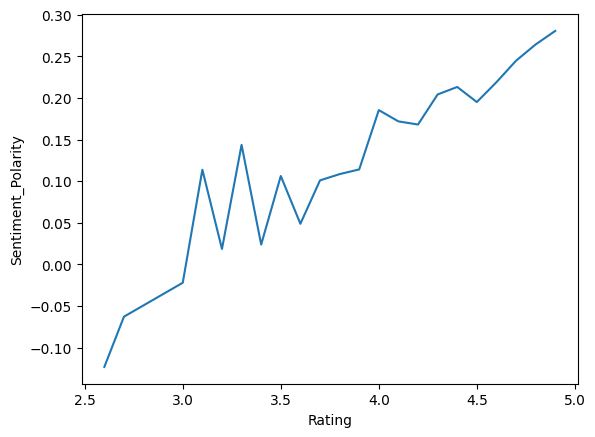

In [103]:
# Sentiment does follow rating 
df2.groupby('Rating')['Sentiment_Polarity'].mean().plot().set_ylabel('Sentiment_Polarity')

Text(0, 0.5, 'Sentiment_Subjectivity')

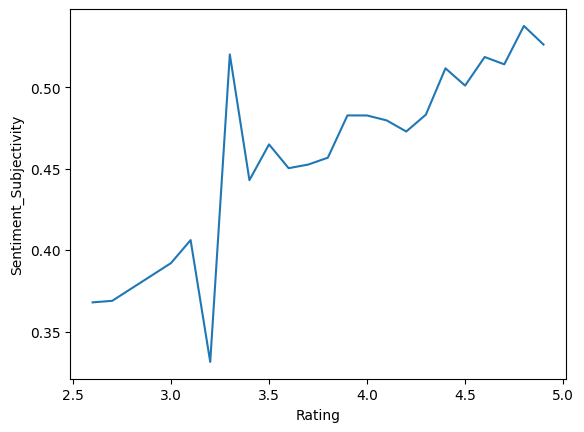

In [104]:
# Subjectivity rise alongside rating, 
# people overall are more subjective when reviewing a good app
df2.groupby('Rating')['Sentiment_Subjectivity'].mean().plot().set_ylabel('Subjectivity Score')

#### Sentiment vs Install number

In [57]:
df2['Sentiment_Polarity'].corr(df2['Installs_num'])

-0.05287966433526491

In [58]:
df2['Sentiment_Subjectivity'].corr(df2['Installs_num'])

-0.004736477934358718


The sentiment analysis revealed that while certain categories tend to have more positive reviews on average, **sentiment polarity and subjectivity showed close to no correlation with install numbers**. This suggests that, in general, users may not place high importance on written reviews when deciding to download an app.

However, apps with strong ratings still tend to receive more positive feedback, implying that **user satisfaction is more tightly linked to ratings than to textual reviews**.

# Machine Learning 


To predict app install ranges, I first encoded install counts as ordered categories and applied a classification model using metadata such as category, type, and reviews. A decision tree classifier served as the baseline, and its performance was evaluated using accuracy and a confusion matrix. I also explored a linear regression model to estimate installs as a continuous variable.
Overall, the classification approach was more interpretable and practical for this dataset.

In [59]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [60]:
# drop the extra column that we make to help EDA
# I choose to leave installs_num and turn it into category data, 
# using the int value to keep the relative relation of the range while keeping the fact that all we know is a range
Xp = dfc.drop(['Installs', 'Rating_Group','Category_Group'], axis= 1)
Xp.head()

,App,Category,Rating,Reviews,Size,Type,Price,Content Rating,Installs_num
8532,+Download 4 Instagram Twitter,SOCIAL,4.5,40467,22.000,Free,0.0,Everyone,1000000
324,- Free Comics - Comic Apps,COMICS,3.5,115,9.100,Free,0.0,Mature 17+,10000
4541,.R,TOOLS,4.5,259,0.203,Free,0.0,Everyone,10000
4636,/u/app,COMMUNICATION,4.7,573,53.000,Free,0.0,Mature 17+,10000
5940,058.ba,NEWS_AND_MAGAZINES,4.4,27,14.000,Free,0.0,Everyone,100


In [61]:
installs_order = [
    1, 5, 10, 50, 100, 500, 1000, 5000, 10000, 50000, 100000, 
    500000, 1000000, 5000000, 10000000, 50000000, 100000000, 
    500000000, 1000000000
]

# Create a mapping of ranges to ordinal values
installs_mapping = {value: idx + 1 for idx, value in enumerate(installs_order)}

# ordinal Encode
Xp['Installs_Encoded'] = Xp['Installs_num'].replace(installs_mapping)

In [62]:
catg = pd.get_dummies(Xp['Category'], prefix = 'catg', drop_first = True)
type = pd.get_dummies(Xp['Type'], prefix = 'type', drop_first = True)
conr = pd.get_dummies(Xp['Content Rating'], prefix = 'conr', drop_first = True)
f = [Xp,catg,type,conr]
Xp = pd.concat(f,axis=1)
Xp.drop(['App','Category','Installs_num','Type','Content Rating'],axis=1,inplace=True)

In [63]:
Xp['Reviews'] = Xp['Reviews'].astype('int')
Xp.drop(['Size'], axis =1, inplace = True)
Xp.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8009 entries, 8532 to 882
Data columns (total 42 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Rating                    8009 non-null   float64
 1   Reviews                   8009 non-null   int64  
 2   Price                     8009 non-null   float64
 3   Installs_Encoded          8009 non-null   int64  
 4   catg_AUTO_AND_VEHICLES    8009 non-null   bool   
 5   catg_BEAUTY               8009 non-null   bool   
 6   catg_BOOKS_AND_REFERENCE  8009 non-null   bool   
 7   catg_BUSINESS             8009 non-null   bool   
 8   catg_COMICS               8009 non-null   bool   
 9   catg_COMMUNICATION        8009 non-null   bool   
 10  catg_DATING               8009 non-null   bool   
 11  catg_EDUCATION            8009 non-null   bool   
 12  catg_ENTERTAINMENT        8009 non-null   bool   
 13  catg_EVENTS               8009 non-null   bool   
 14  catg_FAMILY

In [64]:
X = Xp.drop('Installs_Encoded', axis =1)
y = Xp['Installs_Encoded'].values

In [65]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=0)

In [66]:
from sklearn.preprocessing import StandardScaler
sc_X=StandardScaler()
X_train=sc_X.fit_transform(X_train)
X_test=sc_X.transform(X_test)

In [67]:
dtree_c = DecisionTreeClassifier(criterion='entropy',random_state=0)
dtree_c.fit(X_train,y_train)
dtree_pred = dtree_c.predict(X_test)
dtree_cm = confusion_matrix(y_test,dtree_pred)
dtree_ac = accuracy_score(dtree_pred,y_test)

In [68]:
print('DecisionTree_Classifier_accuracy:',dtree_ac)

DecisionTree_Classifier_accuracy: 0.4818976279650437


In [69]:
df2.groupby(['App']).describe()

Sentiment_Polarity  \
                                                                count   
App                                                                     
10 Best Foods for You                                            95.0   
11st                                                             39.0   
1800 Contacts - Lens Store                                       40.0   
1LINE – One Line with One Touch                                  38.0   
2018Emoji Keyboard 😂 Emoticons Lite -sticker&gif                 29.0   
...                                                               ...   
Hotels.com: Book Hotel Rooms & Find Vacation Deals               39.0   
Hotspot Shield Free VPN Proxy & Wi-Fi Security                   32.0   
Hotstar                                                          32.0   
Hotwire Hotel & Car Rental App                                   33.0   
Housing-Real Estate & Property                                   21.0   

                                                                        \
                                                        mean       std   
App                                                                      
10 Best Foods for You                               0.465906  0.365369   
11st                                                0.185943  0.388543   
1800 Contacts - Lens Store                          0.318145  0.251323   
1LINE – One Line with One Touch                     0.196290  0.409565   
2018Emoji Keyboard 😂 Emoticons Lite -sticker&gif    0.423659  0.435851   
...                                                      ...       ...   
Hotels.com: Book Hotel Rooms & Find Vacation Deals  0.098559  0.318839   
Hotspot Shield Free VPN Proxy & Wi-Fi Security      0.223750  0.406343   
Hotstar                                             0.038178  0.328331   
Hotwire Hotel & Car Rental App                      0.187029  0.378612   
Housing-Real Estate & Property                     -0.021427  0.386664   

                                                                        \
                                                         min       25%   
App                                                                      
10 Best Foods for You                              -0.800000  0.225000   
11st                                               -1.000000  0.000000   
1800 Contacts - Lens Store                         -0.300000  0.200000   
1LINE – One Line with One Touch                    -0.825000  0.000000   
2018Emoji Keyboard 😂 Emoticons Lite -sticker&gif   -0.800000  0.025000   
...                                                      ...       ...   
Hotels.com: Book Hotel Rooms & Find Vacation Deals -0.988281 -0.018401   
Hotspot Shield Free VPN Proxy & Wi-Fi Security     -0.700000  0.000000   
Hotstar                                            -0.555556 -0.168182   
Hotwire Hotel & Car Rental App                     -0.875000  0.000000   
Housing-Real Estate & Property                     -0.528571 -0.362500   

                                                                        \
                                                         50%       75%   
App                                                                      
10 Best Foods for You                               0.500000  0.700000   
11st                                                0.166667  0.450000   
1800 Contacts - Lens Store                          0.340063  0.500000   
1LINE – One Line with One Touch                     0.212500  0.400000   
2018Emoji Keyboard 😂 Emoticons Lite -sticker&gif    0.500000  0.750000   
...                                                      ...       ...   
Hotels.com: Book Hotel Rooms & Find Vacation Deals  0.116667  0.295833   
Hotspot Shield Free VPN Proxy & Wi-Fi Security      0.000000  0.525000   
Hotstar                                             0.000000  0.250000   
Hotwire Hotel & Car Rental App                      0.000000  0.43

In [70]:
df2f = df2.drop(['Translated_Review','Category','Rating','Installs_num'],axis=1)

df2f.drop(['Sentiment'],axis=1,inplace=True)


df2f = df2f.groupby(['App']).describe()

df2f.columns = ['_'.join(col).strip() for col in df2f.columns]
df2f = df2f.reset_index()
df2f = df2f[df2f['Sentiment_Subjectivity_count']>1]

In [71]:
Xp2 = dfc.drop(['Installs', 'Rating_Group','Category_Group'], axis= 1)

Xp2['Installs_Encoded'] = Xp2['Installs_num'].replace(installs_mapping)

f = [Xp2,catg,type,conr]
Xp2 = pd.concat(f,axis=1)
Xp2.drop(['Category','Installs_num','Type','Content Rating','Price'],axis=1,inplace=True)
Xp2['Reviews'] = Xp2['Reviews'].astype('int')


In [72]:
df2fe = pd.merge(df2f,Xp2, on='App', how='inner')
#change features selection
df2fe.drop(['App','Size'],axis=1, inplace = True)
#df2fe['Size'] = df2fe['Size'].fillna(df2fe['Size'].mean())
df2fe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 825 entries, 0 to 824
Data columns (total 57 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Sentiment_Polarity_count      825 non-null    float64
 1   Sentiment_Polarity_mean       825 non-null    float64
 2   Sentiment_Polarity_std        825 non-null    float64
 3   Sentiment_Polarity_min        825 non-null    float64
 4   Sentiment_Polarity_25%        825 non-null    float64
 5   Sentiment_Polarity_50%        825 non-null    float64
 6   Sentiment_Polarity_75%        825 non-null    float64
 7   Sentiment_Polarity_max        825 non-null    float64
 8   Sentiment_Subjectivity_count  825 non-null    float64
 9   Sentiment_Subjectivity_mean   825 non-null    float64
 10  Sentiment_Subjectivity_std    825 non-null    float64
 11  Sentiment_Subjectivity_min    825 non-null    float64
 12  Sentiment_Subjectivity_25%    825 non-null    float64
 13  Senti

In [73]:
X2 = df2fe.drop('Installs_Encoded', axis= 1)
y2 = df2fe['Installs_Encoded'].values

In [74]:
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size = 0.2, random_state=0)

In [75]:
X2_train = sc_X.fit_transform(X2_train)
X2_test = sc_X.transform(X2_test)

In [76]:
dtree_c2 = DecisionTreeClassifier(criterion='entropy',random_state=0)
dtree_c2.fit(X2_train,y2_train)
dtree_pred2 = dtree_c2.predict(X2_test)
dtree_cm2 = confusion_matrix(y2_test,dtree_pred2)
dtree_ac2 = accuracy_score(dtree_pred2,y2_test)

In [77]:
print('DecisionTree_Classifier_accuracy:',dtree_ac2)

DecisionTree_Classifier_accuracy: 0.48484848484848486


In [78]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

regressor = LinearRegression()
regressor.fit(X2_train, y2_train)

# 8. Make predictions
y_pred = regressor.predict(X2_test)

# 9. Evaluate the model
mse = mean_squared_error(y2_test, y_pred)
r2 = r2_score(y2_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r2)


Mean Squared Error: 2.216862260581398
R-squared: 0.37916272302005294


Due to having very limited data, the accuracy of both model are low. 
If we can get data like app description, Ad budget, Release date...etc. It will relly help us reise the performance.
There are a few things that we can try in current situation,
1.  Use Classification Instead of Regression
2.  Reduce Class Imbalance(like the install group range)
3.  Try Other Kind of Model (ensemble model)